### A Linear Algebra Super Power… Regression a.k.a Line Fitting!



Before we get to that, let me quickly demonstrate how to calculate a **norm** and **transpose** in Julia:



In [1]:
using LinearAlgebra
v = [sqrt(3) ; -1 ; sqrt(6)]

#the solution below matches our handwritten solution of sqrt(10)
@show norm(v)

norm(v) = 3.162277660168379


3.162277660168379

In [2]:
A = [1 2 3; 4 5 6]
show(stdout, "text/plain", A)
println()

# B is the transpose of A
B = A'
show(stdout, "text/plain", B)

2×3 Matrix{Int64}:
 1  2  3
 4  5  6
3×2 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4
 2  5
 3  6



---



Regression Practice with Fourier Series!
========================================



The equation for the Fourier Series is below. **We are going to fit some data to this function!**



### f\_n(x) = a\_0 + \Sigma\_{k = 1}^n a\_k \sin(2 k \pi x) + b\_k \cos(2 k \pi x)



**We aim to write a regression solver function that will work for any **1 \leq n \leq 10**.**



This may seem like a lot of work, so we are going to break the problem down into small pieces. This is the best coding strategy! Why? It allows us to check ourselves at each step.



Below is our data (and plot) that we aim to fit:



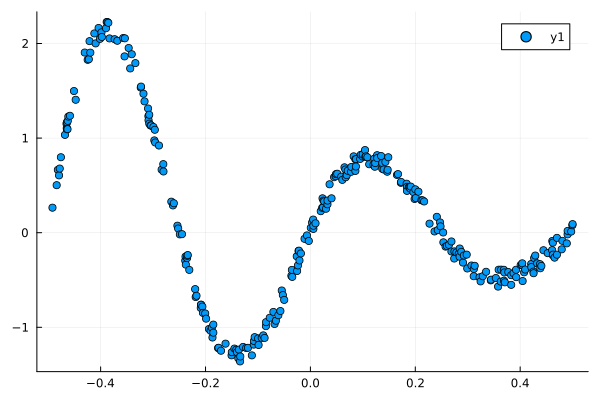

In [3]:
using Random, LinearAlgebra, Plots

#defining a strange function
g(xdata) = exp.(-2*xdata).*sin.(4*pi*xdata)  

#= 
Plotting our function to fit 
There are 300 data points
=#

#this is our x data! We will use this variable later on
xdata = (rand(300, 1) .- 0.5) 
sort!(xdata,dims = 1) 

noise = .2*(rand(300, 1) .- 0.5)

#this is our y data! We will use this variable later on
ydata = g(xdata) + noise

scatter(xdata, ydata)

![](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExejUzNzhkYXB5MGp4a2dkZzBwMWJ2emU5dnR0aWJsdGp6MGk1dHZjZyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/sEms56zTGDx96/giphy.gif)

While that looks like a complicated plot, the Fourier Series will be a great fit! Check out more information about it here on wikipedia if you’re interested: <https://en.wikipedia.org/wiki/Fourier_series>



### 



Before we begin our plan of attack, let’s take an algebraic look at what we are attempting to create. We will show examples for both n=1 and n=3.



When n=1, we have the series



f\_n(x) = a\_0 + a\_1 \sin(2 \pi x) + b\_1 \cos(2 \pi x)



In matrix form we get:



\begin{bmatrix} y\_1 \\ y\_2 \\ \vdots \\y\_N \end{bmatrix} = \begin{bmatrix} 1 & \sin(2 \pi x\_1) & \cos(2 \pi x\_1) \\ 1 & \sin(2 \pi x\_2) & \cos(2 \pi x\_2) \\ \vdots & \vdots & \vdots \\ 1 & \sin(2 \pi x\_N) & \cos(2 \pi x\_N) \ \end{bmatrix} \begin{bmatrix} a\_0 \\ a\_1 \\ b\_1 \end{bmatrix}



When n=3, we have the series



f\_n(x) = a\_0 + a\_1 \sin(2 \pi x) + b\_1 \cos(2 \pi x) + a\_2 \sin(4 \pi x) + b\_2 \cos(4 \pi x) + a\_3 \sin(6 \pi x) + b\_3 \cos(6 \pi x)



In matrix form we get:



\begin{bmatrix} y\_1 \\ y\_2 \\ \vdots \\y\_N \end{bmatrix} = \begin{bmatrix}1 & \sin(2 \pi x\_1) & \cos(2 \pi x\_1) & \sin(4 \pi x\_1) & \cos(4 \pi x\_1) & \sin(6 \pi x\_1) & \cos(6 \pi x\_1)\\ 1 & \sin(2 \pi x\_2) & \cos(2 \pi x\_2) & \sin(4 \pi x\_2) & \cos(4 \pi x\_2) & \sin(6 \pi x\_2) & \cos(6 \pi x\_2)\\ \vdots & \vdots & \vdots \\ 1 & \sin(2 \pi x\_N) & \cos(2 \pi x\_N) & \sin(4 \pi x\_N) & \cos(4 \pi x\_N) & \sin(6 \pi x\_N) & \cos(6 \pi x\_N)\ \end{bmatrix} \begin{bmatrix} a\_0 \\ a\_1 \\ b\_1 \\a\_2 \\b\_2 \\a\_3 \\b\_3 \end{bmatrix}



### Here is our plan to attack this problem:



1. **Write a function that creates a regressor matrix, **\Phi**, for fitting the Fourier Series**
2. **Write a function that solves for **\alpha** in our least squares equation **(\Phi^{T}\Phi)\alpha=\Phi^{T}Y****
3. **Utilize both functions above to write a function that solves our regression problem and generates a new plot**


### 1) Regressor Matrix Function



First, we will create a function for n=1, test if it works, and then use that to create a function for any n.



In [4]:
function makeRegressorMatrix(x)
 N = length(x)
 
 # build Phi by columns (note: you can use a for loop to do by row!) 
 Phi = #ADD YOUR CODE HERE!!!
 
 return Phi
end

makeRegressorMatrix (generic function with 1 method)

**Copy the code above and add your solution to** `Phi`.



In [5]:
function makeRegressorMatrix(x)
    N = length(x)
    
  # build Phi by columns (note: you can use a for loop to do by row!) 
    firstCol = ones(N,1);
    Phi = [firstCol sin.((2*pi).*x) cos.((2*pi).*x)] #ADD YOUR CODE HERE!!!
    
  return Phi
end
#= 
Test with something easy to calculate to make sure the function is correct! 
When checking by hand or caluclator, make sure to divide the 8 into each number
before inserting it into the expression. 
For example sin(2*pi*(1/8)) in a calculator should give you 0.70710678118
=#

x=[1 2 3 4]'/8 
P = makeRegressorMatrix(x)

if P[3,2] == sin(2*pi*(3/8))
  return true
else
  return false
end

true

In [6]:
# the Phi matrix for our actual data when n = 1
makeRegressorMatrix(xdata)

300×3 Matrix{Float64}:
 1.0  -0.051229     -0.998687
 1.0  -0.101353     -0.994851
 1.0  -0.115571     -0.993299
 1.0  -0.129593     -0.991567
 1.0  -0.137846     -0.990454
 1.0  -0.151593     -0.988443
 1.0  -0.199867     -0.979823
 1.0  -0.217832     -0.975986
 1.0  -0.220388     -0.975412
 1.0  -0.221976     -0.975052
 ⋮                  
 1.0   0.186583     -0.982439
 1.0   0.130251     -0.991481
 1.0   0.121682     -0.992569
 1.0   0.069881     -0.997555
 1.0   0.0599052    -0.998204
 1.0   0.0593325    -0.998238
 1.0   0.0170823    -0.999854
 1.0   0.00312585   -0.999995
 1.0   0.000278324  -1.0

In [7]:
function makeRegressorMatrix(x, n)
 N = length(x)

 # build Phi by each column at a time
 # n = 1
 Phi = [ones(N,1) sin.(2\*pi\*x) cos.(2\*pi\*x)]
 # add addition sin and cos columns to the series for every n following 1
 for j = 2:n
 Phi = # YOUR CODE HERE
 end
 return Phi
end

Base.Meta.ParseError: ParseError:
# Error @ d:\CODING\Julia\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X44sZmlsZQ==.jl:6:26
 # n = 1
 Phi = [ones(N,1) sin.(2\*pi\*x) cos.(2\*pi\*x)]
#                        ╙ ── not a unary operator

**Copy the code above and add your solution to** `Phi`



In [9]:
function makeRegressorMatrix(x, n)
    N = length(x)

    # build Phi by each column at a time
    # n = 1
    Phi = [ones(N,1) sin.(2*pi*x) cos.(2*pi*x)]
    # add addition sin and cos columns to the series for every n following 1
    for j = 2:n
      Phi = [Phi sin.(2*pi*j*x) cos.(2*pi*j*x)]# YOUR CODE HERE
    end
    @show Phi
    return Phi
end
# Check a simple test with n = 2
# For example: sin(4*pi*(1/8)) = 1
@show x=[1 2 3 4]'/(8)
P = makeRegressorMatrix(x,2)

if P[3,4] == sin(4*pi*(3/8))
  return true
else
  return false
end

x = ([1 2 3 4])' / 8 = [0.125; 0.25; 0.375; 0.5;;]
Phi = [1.0 0.7071067811865475 0.7071067811865476 1.0 6.123233995736766e-17; 1.0 1.0 6.123233995736766e-17 1.2246467991473532e-16 -1.0; 1.0 0.7071067811865476 -0.7071067811865475 -1.0 -1.8369701987210297e-16; 1.0 1.2246467991473532e-16 -1.0 -2.4492935982947064e-16 1.0]


true

### 2) Least Squares Function



First, we will create a function for n=1, test if it works, and then use that to create a function for any n.



In [10]:
# Helper Functions
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )./U[i,i]
    end
    return x
end

function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
    end
    return x
end

forwardsub (generic function with 1 method)

In [11]:
function solveLeastSquares(Phi,Y)
 if abs(det(Phi'\*Phi)) < 1e-8
 println("Unsolvable - Columns of A are linearly dependent")
 alpha = NaN
 else 
 # YOUR CODE HERE!!!
 end 
 return alpha
end

Base.Meta.ParseError: ParseError:
# Error @ d:\CODING\Julia\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X53sZmlsZQ==.jl:2:18
function solveLeastSquares(Phi,Y)
 if abs(det(Phi'\*Phi)) < 1e-8
#                ╙ ── not a unary operator

**Copy the code above and add your solution**



In [19]:
function solveLeastSquares(Phi,Y)
  if abs(det(Phi'*Phi)) < 1e-8
    println("Unsolvable - Columns of A are linearly dependent")
        alpha = NaN
    else 
        # YOUR CODE HERE!!!
      sqrPhi = Phi' * Phi;
      F = lu(sqrPhi);
      temp = forwardsub(F.L,F.P*(Phi'*Y));
      alpha = backwardsub(F.U,temp)
    end 
    return alpha
end
# Tests with small values and different cases
A = [1 0; 0 1] #should work
b = [2; 3]
@show solveLeastSquares(A,b)

C = [1 0; 0 0.0] #det is = 0
d = [2; 3]
@show solveLeastSquares(C,d)

E = [1 0; 0 1; 0 0] # should work
f = [2; 3; 0]
@show solveLeastSquares(E,f)

if (solveLeastSquares(A,b) == [2.0,3.0]) && isnan(solveLeastSquares(C,d)) && (solveLeastSquares(E,f) == [2.0,3.0])
  return true
else
  return false
end



solveLeastSquares(A, b) = [2.0, 3.0]
Unsolvable - Columns of A are linearly dependent
solveLeastSquares(C, d) = NaN
solveLeastSquares(E, f) = [2.0, 3.0]
Unsolvable - Columns of A are linearly dependent


true

### 3) Regression Solver Function



In [13]:
#=
function to solve the regression problem using the functions above
and plot it
=#
function myBigRegressionProblem(x,y,n)
 # Define Y
 Y = y
 # Build Regressor Matrix
 Phi = # YOUR CODE HERE !!
 # Solve for alphaStar
 alphaStar = # YOUR CODE HERE !!

 # Form yHat and plot it
 yHat = Phi\*alphaStar
 plot!(x,yHat)
 
 return alphaStar
end

Base.Meta.ParseError: ParseError:
# Error @ d:\CODING\Julia\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X60sZmlsZQ==.jl:14:13
 # Form yHat and plot it
 yHat = Phi\*alphaStar
#           ╙ ── not a unary operator

**Copy the code above and add your solution**



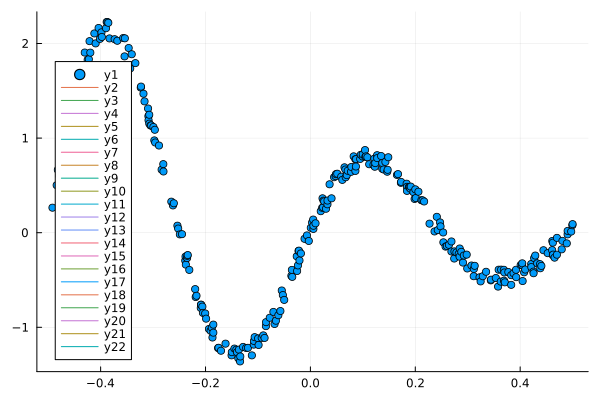

Unsolvable - Columns of A are linearly dependent
alphaStar = myBigRegressionProblem(xdata, ydata, 10) = NaN


BoundsError: BoundsError: attempt to access Float64 at index [2]

In [20]:
#=
function to solve the regression problem using the functions above
and plot it
=#
function myBigRegressionProblem(x,y,n)
    # Define Y
    Y = y;
    # Build Regressor Matrix
    Phi = makeRegressorMatrix(x, n); # YOUR CODE HERE !!
    # Solve for alphaStar
    alphaStar = solveLeastSquares(Phi,Y);# YOUR CODE HERE !!

    # Form yHat and plot it
    yHat = Phi*alphaStar
    plot!(x,yHat)
  
    return alphaStar
end
# Run the function
originalPlot = scatter(xdata, ydata)

# let n = 10 
@show alphaStar = myBigRegressionProblem(xdata,ydata,10)

# the original scatter plot with the regression line on top
display(originalPlot)

if isapprox(alphaStar[2], -0.0847342917354884, atol = 0.02)
  return true
else
  return false
end

You did it!
===========



![](https://i.gifer.com/origin/7c/7c0ba8f4a97cc35d0e0034a7ae2d1e03.gif)

### 

